# Project Final / DTS (Big Data Analytics) 2019

oleh Indaru Sartika

Dataset yang digunakan merupakan data record dari bulan Juli 2007 sampai Juli 2010 pada sebuah perusahaan jasa pengiriman di Brazil, 
dan dapat diakses melalui alamat berikut: http://archive.ics.uci.edu/ml/datasets/Absenteeism+at+work

In [2]:
# import library yang dibutuhkan 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df =pd.read_excel("E://DTS python/final project/Absenteeism_at_work.xls")
df.head()

,ID,Reason,Monthabsence,week,Seasons,Transportation,Distance,Service_time,Age,load,...,Disciplinary_failure,Education,Son,drinker,smoker,Pet,Weight,Height,bmi,Absenteeism
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [3]:
df = df[['Transportation','Age','Service_time','bmi','Weight','Monthabsence','load']]#memilih features yang ining digunakan
df.head()

,Transportation,Age,Service_time,bmi,Weight,Monthabsence,load
0,289,33,13,30,90,7,239554
1,118,50,18,31,98,7,239554
2,179,38,18,31,89,7,239554
3,279,39,14,24,68,7,239554
4,289,33,13,30,90,7,239554


Keterangan Atribute:
    1. Transportation = Biaya Transportasi
    2. Age = Umur Karyawan
    3. Service_time = Waktu Service
    4. bmi = Body Mass Index
    5. Weight = Massa tubuh
    6. Montabsense = Jumlah absen tiap bulan
    7. load = Rata-rata jumlah barang

In [4]:
df.info() #untuk melihat apakah ada data yang kosong

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 7 columns):
Transportation    740 non-null int64
Age               740 non-null int64
Service_time      740 non-null int64
bmi               740 non-null int64
Weight            740 non-null int64
Monthabsence      740 non-null int64
load              740 non-null int64
dtypes: int64(7)
memory usage: 40.5 KB


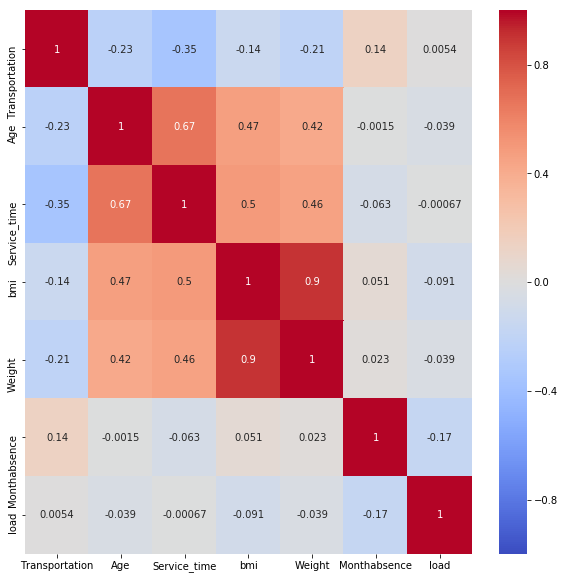

In [18]:
# Melihat Korelasi anatar features
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True);

Berdasarkan hubungan diatas dapat dilihat bahwa dua nilai korelasi yang mendekati nilai satu adalah antara Weight dan bmi, 
Service_time dan Age,  dilihat dari nilainya korelasi antara Weight dan bmi yaitu 0.9 yang merupakan korelasi kuat dibandingkan dengan korelasi antara Service_time dan Age yaitu sebesar 0.67. Nilai korelasi yang didapatkan adalah positif sehingga semakin besar nilai variable independent maka semakin besar nilai variable dependent yang diperoleh, hubnungan teraebut dapat dilakukan pengolahan Regresi Linier. Sebelum melakukan Regresi Linier dapat dilihat pola scatter yang dihasilkan dibawah ini.

### Melihat Pola Scattering 

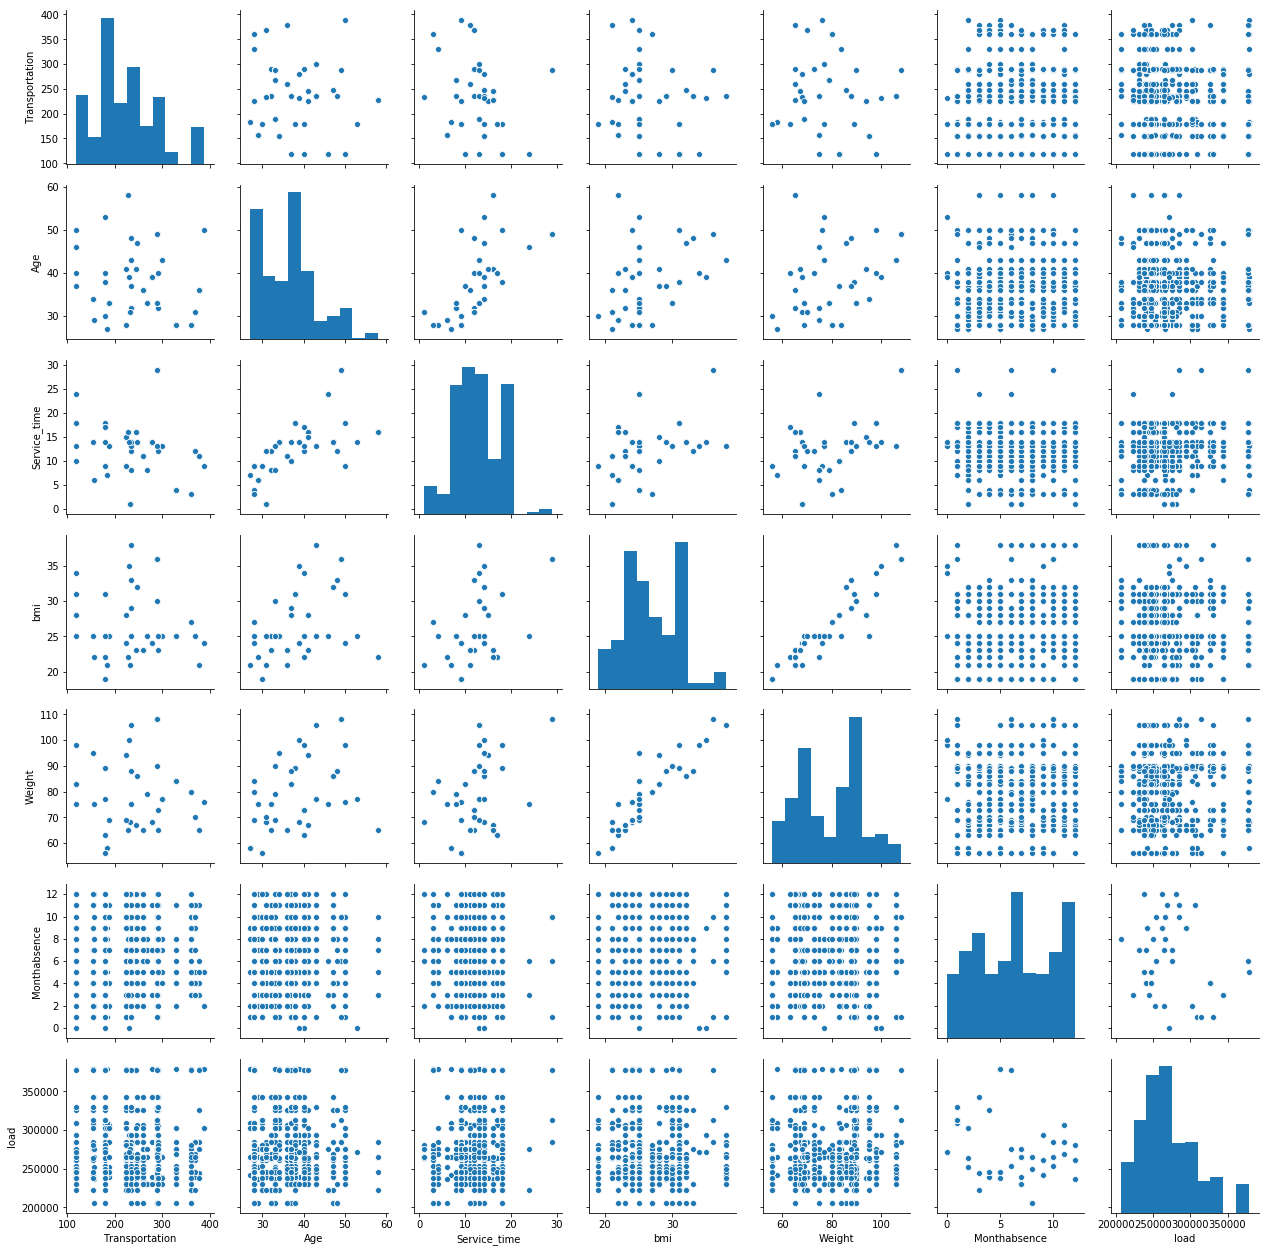

In [6]:
# Melihat pola scattering untuk masing-masing features

import seaborn as sns 
sns.pairplot(df)

Dari pola diatas dapat dipilih features yang memiliki hubungan linier satu sama lain yaitu antara bmi (Body Mass Index) dan Weight dan dilakukan pembuktian sebagai berikut:

### Linier Regression

In [7]:
# Normalisasi data
xdata =df['Weight']/max(df['Weight'])
ydata =df['bmi']/max(df['bmi'])

In [8]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [9]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Weight']])
train_y = np.asanyarray(train[['bmi']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[0.29548739]]
Intercept:  [3.2716036]


Text(0, 0.5, 'Body Mass Index')

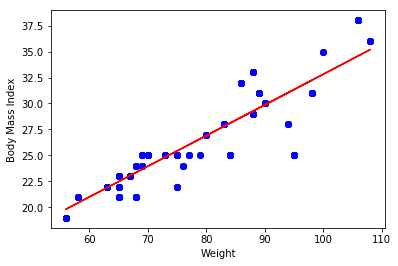

In [10]:
plt.scatter(train.Weight, train.bmi,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Weight")
plt.ylabel("Body Mass Index")

In [11]:
# untuk melakukan testing terhadap linier regresion diatas
test_x= [[60]]
test_y_ = regr.predict(test_x)

print(test_y_)

[[21.00084697]]


In [12]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Weight']])
test_y = np.asanyarray(test[['bmi']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 1.11
Residual sum of squares (MSE): 2.84
R2-score: 0.80


### Statistics Deskriptif

In [13]:
df.describe()

,Transportation,Age,Service_time,bmi,Weight,Monthabsence,load
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,221.329730,36.450000,12.554054,26.677027,79.035135,6.324324,271490.235135
std,66.952223,6.478772,4.384873,4.285452,12.883211,3.436287,39058.116188
min,118.000000,27.000000,1.000000,19.000000,56.000000,0.000000,205917.000000
25%,179.000000,31.000000,9.000000,24.000000,69.000000,3.000000,244387.000000
50%,225.000000,37.000000,13.000000,25.000000,83.000000,6.000000,264249.000000
75%,260.000000,40.000000,16.000000,31.000000,89.000000,9.000000,294217.000000
max,388.000000,58.000000,29.000000,38.000000,108.000000,12.000000,378884.000000


Dengan perintah describe, maka akan didapatkan nilai-nilai statistik yang dibutuhkan yaitu meliahat jumlah data, rata-rata nilai, standart deviasi, nilai minimal dan maximal, serta nilai kuartil 1, 2 dan 3.

### Clustering

In [14]:
# Memilih data yang akan di Clustering yaitu pada kolom 0 (sebagai x) dan 2 (sebagai y) 
X = df.iloc[:, [0,6]].values

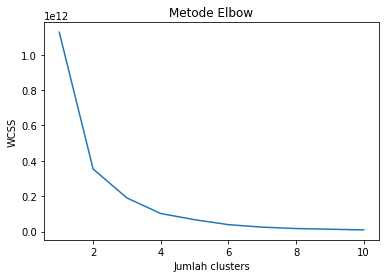

In [15]:
# Menggunakan metode elbow untuk mencari Centroid
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()

Cara menngetahui jumlah centroid yaitu dengan Metode Elbow, dan didapatkan jumlah centroid yaitu 2, karena yang membentuk siku terbesar adalah 2.

In [16]:
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

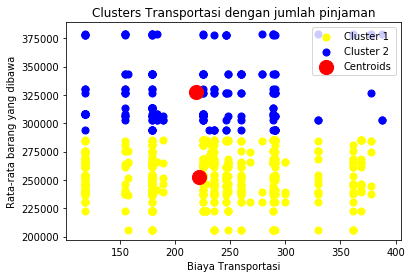

In [17]:
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'yellow', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'red', label = 'Centroids')
plt.title('Clusters Transportasi dengan jumlah pinjaman')
plt.xlabel('Biaya Transportasi')
plt.ylabel('Rata-rata barang yang dibawa')
plt.legend()
plt.show()

Cluster tersebut merupakan pengelompokan hubungan antara biaya Transportasi dengan rata-rata jumlah barang yang dibawa.